In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

In [2]:
df_ghg = pd.read_csv("./Data/UK_LA_GHG_EMISSIONS.csv")
df_roadlength = pd.read_csv("./Data/rdl0202.csv", skiprows=6, thousands=",")

In [3]:
df_roadlength.drop(columns=df_roadlength.columns[-57:], axis=1, inplace=True)
df_merged = df_ghg.merge(df_roadlength, how="inner", left_on="Local Authority Code", right_on="ONS Area \nCode")
#df_merged.rename(columns={"2021": "Census Population Density"}, inplace=True)
df_merged

,Country,Country Code,Region_x,Region Code,Second Tier Authority,Local Authority_x,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,...,All 'A' roads,Rural 'B' roads,Urban 'B' roads,Rural 'C' and 'U' roads,Urban 'C' and 'U' roads,All minor roads,Major trunk roads,Major principal roads,Minor roads,Total road length
0,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,...,74.7,0.5,5.7,36.5,661.5,704.3,17.4,57.3,704.3,779.0
1,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,...,74.7,0.5,5.7,36.5,661.5,704.3,17.4,57.3,704.3,779.0
2,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,...,74.7,0.5,5.7,36.5,661.5,704.3,17.4,57.3,704.3,779.0
3,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Gas,...,74.7,0.5,5.7,36.5,661.5,704.3,17.4,57.3,704.3,779.0
4,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Gas,...,74.7,0.5,5.7,36.5,661.5,704.3,17.4,57.3,704.3,779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227511,Wales,W92000004,Wales,W92000004,Wales,Wrexham,W06000006,2020,Transport,Transport 'Other',...,129.6,121.6,26.6,648.6,289.1,1085.9,30.4,99.2,1085.9,1215.5
227512,Wales,W92000004,Wales,W92000004,Wales,Wrexham,W06000006,2020,Waste management,Landfill,...,129.6,121.6,26.6,648.6,289.1,1085.9,30.4,99.2,1085.9,1215.5
227513,Wales,W92000004,Wales,W92000004,Wales,Wrexham,W06000006,2020,Waste management,Waste management 'Other',...,129.6,121.6,26.6,648.6,289.1,1085.9,30.4,99.2,1085.9,1215.5
227514,Wales,W92000004,Wales,W92000004,Wales,Wrexham,W06000006,2020,Waste management,Waste management 'Other',...,129.6,121.6,26.6,648.6,289.1,1085.9,30.4,99.2,1085.9,1215.5


In [4]:
boolean_mask1 = (df_merged["LA GHG Sector"] == "Transport")
boolean_mask2 = (df_merged["LA GHG Sub-sector"] == "Road Transport (A roads)")
boolean_mask3 = (df_merged["Greenhouse gas"] == "CO2")

df_merged = df_merged[boolean_mask1 & boolean_mask2 & boolean_mask3]
df_merged.reset_index(inplace=True)

In [5]:
year_condition = (df_merged["Calendar Year"] == 2018)

df_merged_2018 = df_merged[year_condition]
df_merged_2018.reset_index(inplace=True)

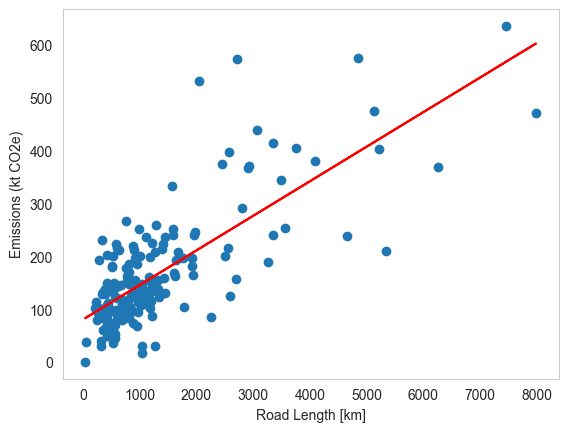

In [8]:
plt.scatter(list(df_merged_2018["Total road length "]), list(df_merged_2018["Territorial emissions (kt CO2e)"]))

#TRENDLINE
z = np.polyfit(list(df_merged_2018["Total road length "]), list(df_merged_2018["Territorial emissions (kt CO2e)"]), 1)
p = np.poly1d(z)
plt.plot(list(df_merged_2018["Total road length "]),p(list(df_merged_2018["Total road length "])),"r")

plt.xlabel("Road Length [km]")
plt.ylabel("Emissions (kt CO2e)")
plt.grid(False)
plt.show()

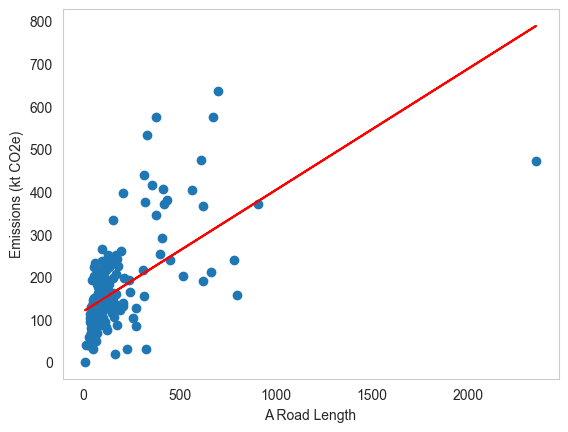

In [9]:
plt.scatter(list(df_merged_2018["All \'A\' roads"]), list(df_merged_2018["Territorial emissions (kt CO2e)"]))

#TRENDLINE
z = np.polyfit(list(df_merged_2018["All \'A\' roads"]), list(df_merged_2018["Territorial emissions (kt CO2e)"]), 1)
p = np.poly1d(z)
plt.plot(list(df_merged_2018["All \'A\' roads"]),p(list(df_merged_2018["All \'A\' roads"])),"r")

plt.xlabel("A Road Length")
plt.ylabel("Emissions (kt CO2e)")
plt.grid(False)
plt.show()


In [23]:
# CORRELATION OF AROAD LENGTH WITH EMISSIONS
scipy.stats.pearsonr(list(df_merged_2018["All \'A\' roads"]), list(df_merged_2018["Territorial emissions (kt CO2e)"]))

PearsonRResult(statistic=0.5999621132397017, pvalue=3.551449356567098e-19)

In [25]:
# CORRELATION OF TOTAL ROAD LENGTH WITH EMISSIONS
scipy.stats.pearsonr(list(df_merged_2018["Total road length "]), list(df_merged_2018["Territorial emissions (kt CO2e)"]))

PearsonRResult(statistic=0.7607156016393408, pvalue=1.2737419021910182e-35)

In [31]:
# CORRELATION OF AROAD LENGTH WITH EMISSIONS EXCLUDING OUTLIERS
boolean_mask = (df_merged_2018["All \'A\' roads"] < 1500)
scipy.stats.pearsonr(list(df_merged_2018[boolean_mask]["Total road length "]), list(df_merged_2018[boolean_mask]["Territorial emissions (kt CO2e)"]))

PearsonRResult(statistic=0.7546124874185297, pvalue=1.3848443140744555e-34)

In [28]:
df_merged_2018.sort_values(by=["All \'A\' roads"], ascending=False)

,level_0,index,Country,Country Code,Region_x,Region Code,Second Tier Authority,Local Authority_x,Local Authority Code,Calendar Year,...,All 'A' roads,Rural 'B' roads,Urban 'B' roads,Rural 'C' and 'U' roads,Urban 'C' and 'U' roads,All minor roads,Major trunk roads,Major principal roads,Minor roads,Total road length
143,2301,179879,Scotland,S92000003,Scotland,S92000003,Scotland,Highland,S12000017,2018,...,2353.2,911.1,56.1,3797.9,869.8,5635.0,960.7,1392.5,5635.0,7988.2
129,2077,161975,Scotland,S92000003,Scotland,S92000003,Scotland,Aberdeenshire,S12000034,2018,...,909.8,735.5,57.0,3667.3,887.5,5347.3,192.0,717.8,5347.3,6257.1
131,2109,164511,Scotland,S92000003,Scotland,S92000003,Scotland,Argyll and Bute,S12000035,2018,...,796.6,587.3,23.6,999.0,288.6,1898.5,301.5,495.1,1898.5,2695.1
134,2157,168394,Scotland,S92000003,Scotland,S92000003,Scotland,Dumfries and Galloway,S12000006,2018,...,784.4,699.5,33.4,2633.9,443.0,3809.8,344.0,500.8,3809.8,4654.6
93,1501,116710,England,E92000001,South West,E12000009,Cornwall,Cornwall,E06000052,2018,...,701.2,558.4,24.4,5477.0,699.1,6758.8,155.6,545.6,6758.8,7460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,397,30299,England,E92000001,London,E12000007,Hammersmith and Fulham,Hammersmith and Fulham,E09000013,2018,...,32.2,0.0,4.7,0.0,183.0,187.7,0.0,32.2,187.7,219.9
40,653,49571,England,E92000001,London,E12000007,Sutton,Sutton,E09000029,2018,...,29.6,0.0,28.4,0.0,375.4,403.8,0.0,29.6,403.8,433.4
86,1389,107958,England,E92000001,South East,E12000008,Slough,Slough,E06000039,2018,...,22.7,0.8,4.8,13.1,272.5,291.1,9.3,22.7,291.1,323.1
18,301,23132,England,E92000001,London,E12000007,City of London,City of London,E09000001,2018,...,12.4,0.0,1.1,0.0,41.9,43.0,0.0,12.4,43.0,55.4
